The purpose of this notebook is to compute the first of two quality assurance criteria for eye-tracking data in the LDM experiment.

**Criterion  1**:  average agreement  between  the  position  of custom AoI centers marked by two independent raters.

**Criterion  2**: percentage of samples that fall outside a valid AoI.

Participants who fall more than 1.5×IQR above 3rd quartile in either criterion should be excluded from further analysis.

In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as matplotlib
from matplotlib.colors import ListedColormap
import seaborn as sns
import scipy.io as io
import pandas as pd
from pandas import DataFrame, read_csv
from nivlink import Screen, Raw, align_to_aoi, compute_fixations, plot_heatmaps

import warnings
from scipy.stats import kde
import nivlink
import ipywidgets as wdg
from scipy.stats import iqr
print('Powered by NivLink' + str(nivlink.__version__))

Powered by NivLink0.2.5


In [2]:
all_subjects =  [23, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 
                 55, 57, 58, 60, 61, 62, 63, 66, 67, 68, 69, 70, 71];

## Compute rater distance.

In [3]:
def compute_distance(subj_id, block):

    c1 = pd.read_csv(os.getcwd() + '/labelcenters/' + 'Sub' + str(subj_id) + '_block_' + str(block) + '_centers_AR.csv')
    c2 = pd.read_csv(os.getcwd() + '/labelcenters/' + 'Sub' + str(subj_id) + '_block_' + str(block) + '_centers_NB.csv')
    
    # Compute distance for each x, y cooordinate. 
    rater_distance = abs((c1 - c2))
    
    # Average agreement (first over x, y directions, and then over AoIs).
    rater_distance = np.mean(rater_distance.mean(axis=0).values)
    
    return rater_distance

In [4]:
S = []
B = []
D = []

# Loop through subjects.
for subj_id in all_subjects:
    
    # Compute agreement for each block. 
    d = []
    for b in np.arange(10):
        
            block = b + 1
            d.append(compute_distance(subj_id, block))
    
    # Append. 
    S.append(subj_id)
    D.append(np.mean(d))

## Plot distribution.

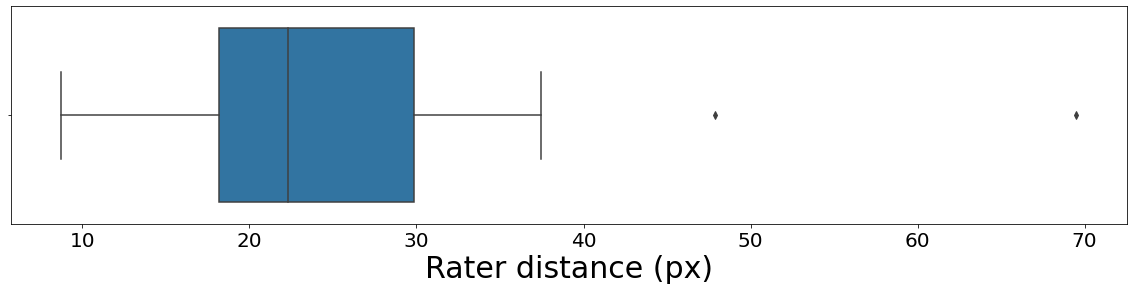

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax = sns.boxplot(x=D, whis=1.5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Rater distance (px)', fontsize=30);

## Compute outliers.

In [9]:
## Compute outliers (1.5 IQR above 3rd quartile). 
Q = [np.quantile(D, x) for x in [.25,.50,.75]]
IQR = Q[2] - Q[0]

failed_qa = [S[i] for i in np.where(D > (Q[2] + IQR*1.5))[0]]
print('Subjects that failed QA check: ')
print(failed_qa)

Subjects that failed QA check: 
[33, 66]
